In [9]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['figure.dpi'] = 100

In [10]:
cmin=23 # min diameter, 30?
cmax=50 # max diameter, 50?
n = cmax-cmin+1
colors = plt.cm.rainbow(np.linspace(0, 1, n))
norm = mpl.colors.Normalize(vmin=cmin, vmax=cmax)
cmap = plt.get_cmap('rainbow', n)
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

In [11]:
def import_kinetiscope(f):
    data=pd.read_table(f,header=None,sep='\s') #read file
    data1=data.to_numpy() # convert to array
    data2=data1[~np.isnan(data1)] # remove NaN
    data3=np.reshape(data2,(-1,5)) # reshape into 5 columns
    return pd.DataFrame(data3, columns = ['Index','Time_s','Sites','Surf_ads','Surf_bulk']) # sites, surfactant_ads and surfactant_bulk in units of molecules/cm^3

def surface_coverage(G_max,surf_con):
    delta=1e-7 #surface thickness in cm
    return (delta/G_max)*surf_con

def surface_tension(theta,G_max,st_min):
    st_calc = (0.0728 + G_max*8.314*295*np.log(1-theta))*1000 # surface tension (mN/m)
    #print(st_calc)
    st=[]
    i=0
    while i < len(theta): # if surface tension falls is below the macrosocpic case minimum, set = surface tension when concentration is greater than the CMC
        diff = st_calc[i] - st_min
        if diff > 0:
            surf_ten = st_calc[i]
        else:
            surf_ten = st_min
        #print(surf_ten)
        st=np.append(st,surf_ten)
        i=i+1
    return st

In [12]:
f = r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Kinetiscope Simulations\10mM OTG\OTG-4'
r_1um=import_kinetiscope(f+'\OTG-1um.txt')
r_5um=import_kinetiscope(f+'\OTG-5um.txt')
r_10um=import_kinetiscope(f+'\OTG-10um.txt')
r_20um=import_kinetiscope(f+'\OTG-20um.txt')
r_50um=import_kinetiscope(f+'\OTG-50um.txt')
r_100um=import_kinetiscope(f+'\OTG-100um.txt')

c:\Users\zu21202\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


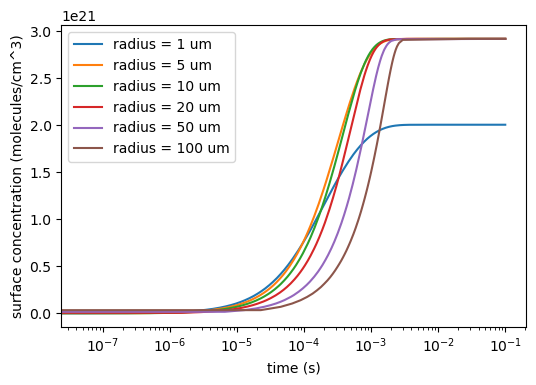

In [13]:
plt.plot(r_1um.Time_s,r_1um.Surf_ads,label='radius = 1 um')
plt.plot(r_5um.Time_s,r_5um.Surf_ads,label='radius = 5 um')
plt.plot(r_10um.Time_s,r_10um.Surf_ads,label='radius = 10 um')
plt.plot(r_20um.Time_s,r_20um.Surf_ads,label='radius = 20 um')
plt.plot(r_50um.Time_s,r_50um.Surf_ads,label='radius = 50 um')
plt.plot(r_100um.Time_s,r_100um.Surf_ads,label='radius = 100 um')
plt.xlabel('time (s)')
plt.xscale('log')
plt.ylabel('surface concentration (molecules/cm^3)')
plt.legend()
plt.show()


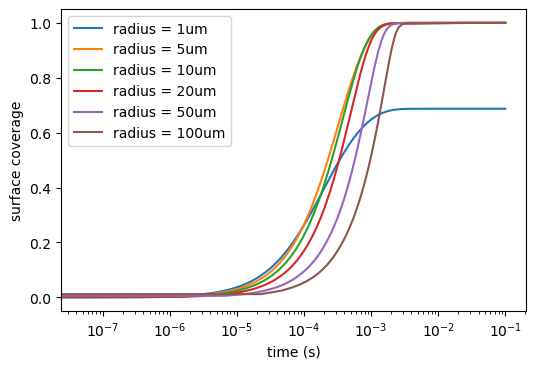

In [14]:
theta_1um=surface_coverage(2.92E14,r_1um.Surf_ads)
theta_5um=surface_coverage(2.92E14,r_5um.Surf_ads)
theta_10um=surface_coverage(2.92E14,r_10um.Surf_ads)
theta_20um=surface_coverage(2.92E14,r_20um.Surf_ads)
theta_50um=surface_coverage(2.92E14,r_50um.Surf_ads)
theta_100um=surface_coverage(2.92E14,r_100um.Surf_ads)


plt.plot(r_1um.Time_s,theta_1um,label='radius = 1um')
plt.plot(r_5um.Time_s,theta_5um,label='radius = 5um')
plt.plot(r_10um.Time_s,theta_10um,label='radius = 10um')
plt.plot(r_20um.Time_s,theta_20um,label='radius = 20um')
plt.plot(r_50um.Time_s,theta_50um,label='radius = 50um')
plt.plot(r_100um.Time_s,theta_100um,label='radius = 100um')
plt.xlabel('time (s)')
plt.ylabel('surface coverage')
plt.xscale('log')
plt.legend()
plt.show()


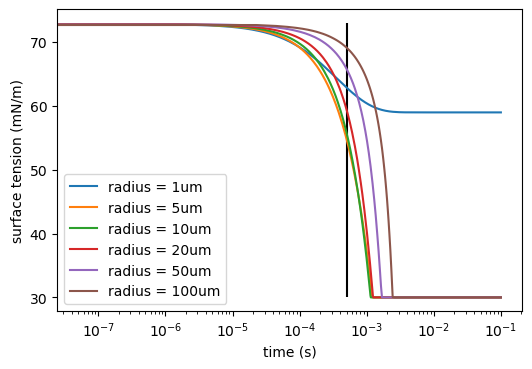

In [15]:
st_1um=surface_tension(theta_1um,4.85E-6,30)
st_5um=surface_tension(theta_5um,4.85E-6,30)
st_10um=surface_tension(theta_10um,4.85E-6,30)
st_20um=surface_tension(theta_20um,4.85E-6,30)
st_50um=surface_tension(theta_50um,4.85E-6,30)
st_100um=surface_tension(theta_100um,4.85E-6,30)

plt.plot(r_1um.Time_s,st_1um,label='radius = 1um')
plt.plot(r_5um.Time_s,st_5um,label='radius = 5um')
plt.plot(r_10um.Time_s,st_10um,label='radius = 10um')
plt.plot(r_20um.Time_s,st_20um,label='radius = 20um')
plt.plot(r_50um.Time_s,st_50um,label='radius = 50um')
plt.plot(r_100um.Time_s,st_100um,label='radius = 100um')
plt.xlabel('time (s)')
plt.ylabel('surface tension (mN/m)')
plt.legend()
#plt.ylim(30,72.8)
plt.vlines(0.0005,30,73,color='black')
plt.xscale('log')
plt.legend()
plt.show()

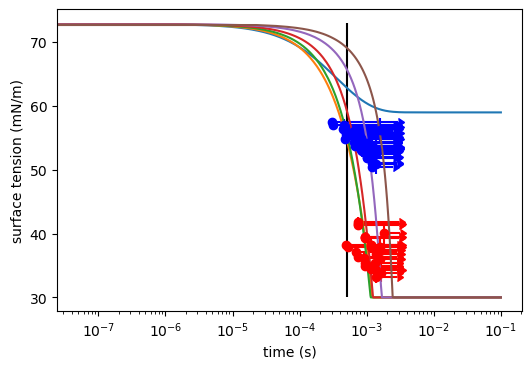

In [16]:
root=r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Oscillating Droplet\OTG\04-04-size-compare\First Droplets'
folderList = os.listdir(root)
diam=[]
for folder in folderList:
    path=os.path.join(root,folder)
    fileList=os.listdir(path)
    file = glob.glob(path + "/*.csv")
    if len(file)>0:
        dat=pd.read_csv(file[0],index_col=0)
        diamter='d='+str(file[0][-10:-8])+'μm'
        d=int(file[0][-10:-8])
        diam=np.append(diam,d)
        #c=colors[d-cmin]  
        plt.errorbar(10E-6*dat.slice_time_us,dat.surface_tension_mN_m,yerr=dat.surface_tension_error,xerr=10E-6*dat.FFT_time_us, xlolims=True,marker='o',linestyle='None',label=diamter, color='red')
        #plt.legend(bbox_to_anchor=(1.005, 1.0))
root=r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Oscillating Droplet\OTG\04-04-size-compare\Second Droplets'
folderList = os.listdir(root)
diam=[]
for folder in folderList:
    path=os.path.join(root,folder)
    fileList=os.listdir(path)
    file = glob.glob(path + "/*.csv")
    if len(file)>0:
        dat=pd.read_csv(file[0],index_col=0)
        diamter='d='+str(file[0][-10:-8])+'μm'
        d=int(file[0][-10:-8])
        diam=np.append(diam,d)
        #c=colors[d-cmin]  
        plt.errorbar(10E-6*dat.slice_time_us,dat.surface_tension_mN_m,yerr=dat.surface_tension_error,xerr=10E-6*dat.FFT_time_us, xlolims=True,marker='o',linestyle='None',label=diamter, color='blue')

plt.plot(r_1um.Time_s,st_1um,label='radius = 1um')
plt.plot(r_5um.Time_s,st_5um,label='radius = 5um')
plt.plot(r_10um.Time_s,st_10um,label='radius = 10um')
plt.plot(r_20um.Time_s,st_20um,label='radius = 20um')
plt.plot(r_50um.Time_s,st_50um,label='radius = 50um')
plt.plot(r_100um.Time_s,st_100um,label='radius = 100um')
plt.xlabel('time (s)')
plt.ylabel('surface tension (mN/m)')
#plt.legend()
#plt.ylim(30,72.8)
plt.vlines(0.0005,30,73,color='black')
plt.xscale('log')
#plt.legend()
plt.show()


c:\Users\zu21202\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


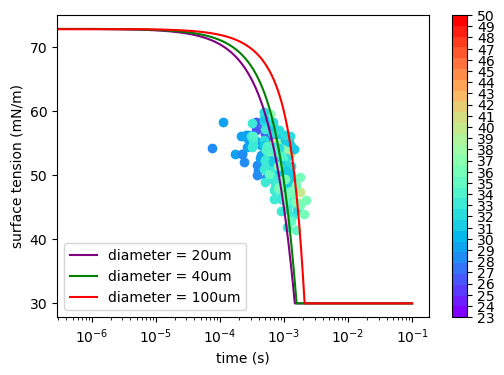

In [29]:
f = r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Kinetiscope Simulations\8mM OTG'
r_10um=import_kinetiscope(f+'\OTG-10um.txt')
r_20um=import_kinetiscope(f+'\OTG-20um.txt')
r_50um=import_kinetiscope(f+'\OTG-50um.txt')
theta_10um=surface_coverage(2.92E14,r_10um.Surf_ads)
theta_20um=surface_coverage(2.92E14,r_20um.Surf_ads)
theta_50um=surface_coverage(2.92E14,r_50um.Surf_ads)
st_10um=surface_tension(theta_10um,4.85E-6,30)
st_20um=surface_tension(theta_20um,4.85E-6,30)
st_50um=surface_tension(theta_50um,4.85E-6,30)




root=r'C:\Users\zu21202\OneDrive - University of Bristol\Documents\UoB-PostDoc\Oscillating Droplet\OTG\2022-04-06-Wed'
folderList = os.listdir(root)
diam=[]
for folder in folderList:
    path=os.path.join(root,folder)
    fileList=os.listdir(path)
    file = glob.glob(path + "/*.csv")
    if len(file)>0:
        dat=pd.read_csv(file[0],index_col=0)
        diamter='d='+str(file[0][-10:-8])+'μm'
        d=int(file[0][-10:-8])
        diam=np.append(diam,d)
        c=colors[d-cmin]  
        plt.scatter(10E-6*dat.slice_time_us,dat.surface_tension_mN_m, color=c)
plt.plot(r_10um.Time_s,st_10um,label='diameter = 20um',color='purple')
plt.plot(r_20um.Time_s,st_20um,label='diameter = 40um',color='green')
plt.plot(r_50um.Time_s,st_50um,label='diameter = 100um',color='red')
plt.xlabel('time (s)')
plt.ylabel('surface tension (mN/m)')
plt.xscale('log')
plt.legend()
cbar = plt.colorbar(sm, ticks=np.linspace(cmin, cmax, n))
plt.show()

